<a href="https://colab.research.google.com/github/Flavio-DS/Colab/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# remove warnings
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT ADSP/Project Assessment: Foundations for Data Science/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

>The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Shape of the Data
df.shape
print(f'The data frame has {df.shape[0]} rows and {df.shape[1]} columns')

The data frame has 1898 rows and 9 columns


#### Observations:

> There are 1898 rows and 9 columns in the Dataset.




### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Datatypes of the different columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
> There are 5 numerical columns and 4 categorical columns.

> We observe that each columns have the same amount of entries (1898).

> Rating variable is currently a categorical column, it should be a float. It's treated as an object because we see 'Not Given' values.


In [ ]:
# Check unique values in rating variable
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

**Observations:**

>we will probably need to do calulations on the rating variable, we need to replace the 'Not Given' value to NaN and change the type of the column to 'Float'.

In [ ]:
# replace values with NaN
df['rating'] = df['rating'].replace('Not given',np.nan)

# change the type of the column to float
df['rating'] = df['rating'].astype(float)

# Checking the change has been successfuly done
df.info()

# Checking if NaN is present in the data frame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking if there is missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


In [ ]:
# Checking the percentage of missing values
df.isnull().sum()/df.shape[0]*100

,0
order_id,0.000000
customer_id,0.000000
restaurant_name,0.000000
cuisine_type,0.000000
cost_of_the_order,0.000000
day_of_the_week,0.000000
rating,38.777661
food_preparation_time,0.000000
delivery_time,0.000000


Observations:
> There are missing values in the 'rating column', 38% of the data is missing(736 values).

> We will need to check and treat this missing values the most effectively possible.


####Exploring missing values for rating and checking correlation

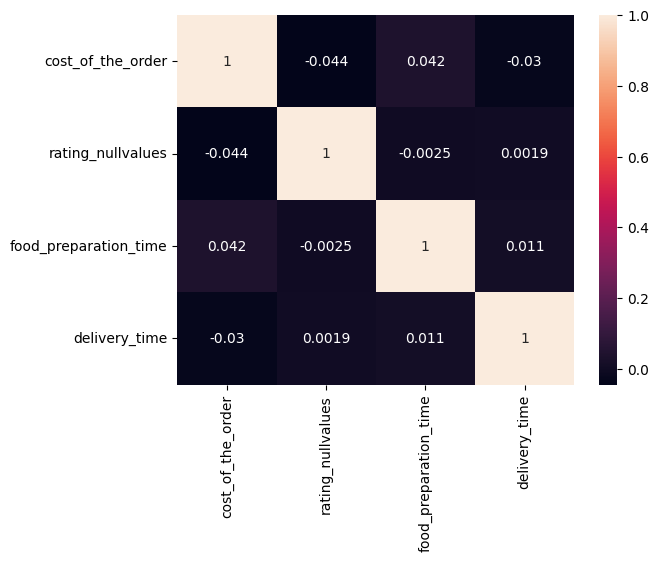

In [ ]:
# creating a new variable with all rating missing values only
df['rating_nullvalues'] = df['rating'].isnull().astype(int)

# Creating a correlation heat map to see the relationship of all numerical data and our rating missing values
sns.heatmap(data=df[['cost_of_the_order','rating_nullvalues','food_preparation_time','delivery_time']].corr(), annot=True,)
plt.show()

In [ ]:
# checking if there is a relation of missing values accross days of the week

df.loc[df['rating'].isnull() == True, 'day_of_the_week'].value_counts()/df['day_of_the_week'].value_counts()*100

,count
day_of_the_week,
Weekend,39.156181
Weekday,37.842779


In [ ]:
# checking if there is a relation of missing values accross cuisine types

df.loc[df['rating'].isnull() == True, 'cuisine_type'].value_counts()/df['cuisine_type'].value_counts()*100

,count
cuisine_type,
American,36.986301
Chinese,38.139535
French,44.444444
Indian,31.506849
Italian,42.281879
Japanese,41.914894
Korean,30.769231
Mediterranean,30.434783
Mexican,37.662338


In [ ]:
# deletion of the Rating null values column
df.drop('rating_nullvalues', axis=1, inplace=True)

**Observations**
> the missing 'rating' values are consistent regardless of the day of the week and the cuisine type.

> The heatmap is showing little to no correlation with other numerical variables, it's indicating this may be random.

####Treating missing values of rating

> We could impute the missing values of each restaurant by their existing weighted rating mean (As some of restaurants have few ratings, instead of just the mean).

> Some restaurants have no rating, we could impute the missing values by the average rating of their respective cuisine type but that will lead to an unwanted bias.

> We will let the order rating for restaurants that have no rating to Nan to avoid any bias in our analysis (30 values, 1,5%).

In [ ]:
# checking the average rating by restaurant name and cuisine type
df.groupby(['cuisine_type', 'restaurant_name'])['rating'].mean()

cuisine_type  restaurant_name           
American      'wichcraft                    5.000000
              5 Napkin Burger               4.000000
              67 Burger                     5.000000
              Alidoro                            NaN
              Bareburger                    4.058824
                                              ...   
Thai          Song Thai Restaurant & Bar    5.000000
              Spice Thai                         NaN
Vietnamese    Nha Trang One                 3.000000
              V-Nam Cafe                    4.000000
              Xe May Sandwich Shop          5.000000
Name: rating, Length: 179, dtype: float64

In [ ]:
# filling missing values for restaurants with weighted mean
df['rating'] = df.groupby(['cuisine_type', 'restaurant_name'])['rating'].transform(lambda x: x.fillna(x.mean()))
df.head()
#df.groupby(['restaurant_name'])['rating'].transform('mean') #initiate the lookup table

#imputing missing values in rating
#df['rating'] = df['rating'].fillna(value= df.groupby(['cuisine_type', 'restaurant_name'])['rating'].transform('mean'))

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24


In [ ]:
# Checking the remaining missing values, that should be the ones corresponding to restaurants without rating
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,30
food_preparation_time,0
delivery_time,0


In [ ]:
# Checking the percentage of remaining missing values
df.isnull().sum()/df.shape[0]*100

,0
order_id,0.000000
customer_id,0.000000
restaurant_name,0.000000
cuisine_type,0.000000
cost_of_the_order,0.000000
day_of_the_week,0.000000
rating,1.580611
food_preparation_time,0.000000
delivery_time,0.000000


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1868.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.349261,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.610835,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,4.328125,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

> cost-of_the_order : the average order cost is ~14 dollars. The minimum is 4.5 dollards and the maximum is 35 dollars, it's indicating a large range in order costs.

> delivery_time : the average is 25 minutes with a standard deviation of ~5 minutes , the minimum is 15 minutes and the maximum is 35 minutes.

> rating : the average is 4.3, there are no order rating below 3.


>The minimum, average and maximum time it takes for food to be prepared once and order is placed is 20,27.37 and 35 minutes respectively.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Orders without rating
owr =df['rating'].isnull().sum()
print(f'There are {owr} orders without rating')

There are 30 orders without rating


#### Observations:
> Before we treated the 'Not Given' values in the rating column, there were 736 orders without rating , we decided to only treat the orders without rating with restaurants who already had rating.

>30 orders remains without rating because of restaurant having no rating.

>To avoid any bias in our analysis, we will let them as it's, it's representing only 1,5% of our total orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####**Let's explore the numerical variables first**

We will use histograms and boxplots to explore the numerical variables.

#### Observations on Food Preparation Time

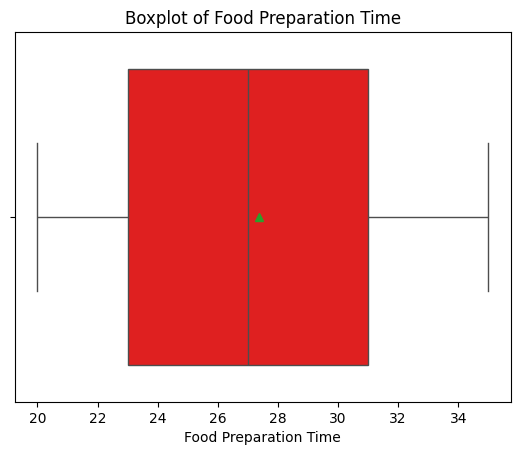

In [ ]:
# Boxplot of food_preparation_time variable , showing the mean,  label & Title set
sns.boxplot(x=df['food_preparation_time'], showmeans=True, color='Red')
plt.xlabel('Food Preparation Time')
plt.title('Boxplot of Food Preparation Time')
plt.show()

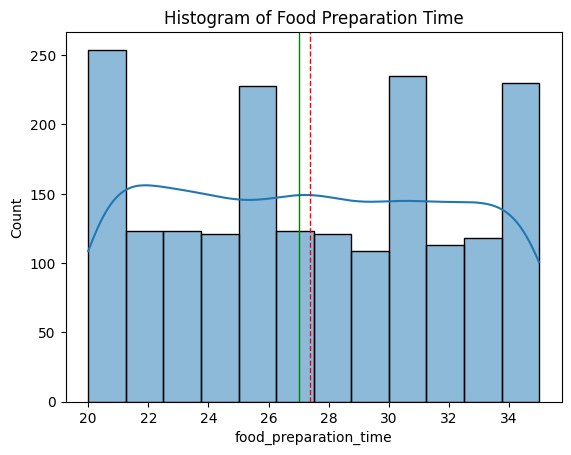

In [ ]:
# Histogram of food_preparation_time variable , showing the mean in red and median in green,  label & Title set
sns.histplot(x=df['food_preparation_time'], kde=True)
plt.axvline(df['food_preparation_time'].mean(), color='red', linestyle='--', linewidth=1)
plt.axvline(df['food_preparation_time'].median(), color='green', linestyle='-', linewidth=1)
plt.title('Histogram of Food Preparation Time')
plt.show()

**Observations :**
>The median preparation time is equal to 27 minutes, and the mean is~27.4 minutes.

>The preparation time has several peaks  20,26,30,34 minutes, with 20 minutes being the most common.

> 75% of the preparation time is under 31 minutes.

>There are no outliers in this variable.

#### Observations on Delivery Time

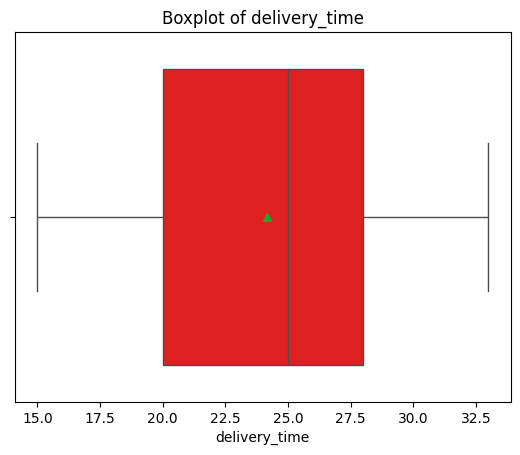

In [ ]:
# Boxplot of delivery_time variable , showing the mean,  label & Title set
sns.boxplot(x=df['delivery_time'], showmeans=True, color='Red')
plt.title('Boxplot of delivery_time')
plt.show()

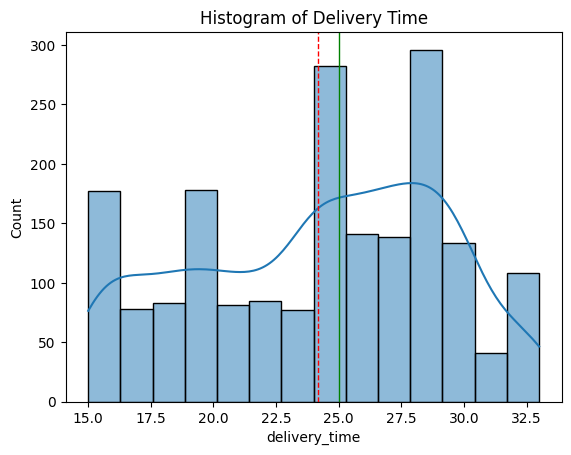

In [ ]:
# Histogram of delivery_time , showing the mean in red and median  in green, Title set
sns.histplot(x=df['delivery_time'], kde=True)
plt.axvline(df['delivery_time'].mean(), color='red', linestyle='--', linewidth=1)
plt.axvline(df['delivery_time'].median(), color='green', linestyle='-', linewidth=1)
plt.title('Histogram of Delivery Time')
plt.show()

**Observations :**
>The median delivery time is 25 minutes, and the means ~24 minutes.

>The majority of delivery time are around 25 or 28 minutes.

>There are no outliers in this variable.

>The large range of delivery time (max value is more than the double of min value) could indicate a delivery performance issue, but need further analysis.

####Observations on Cost of the order

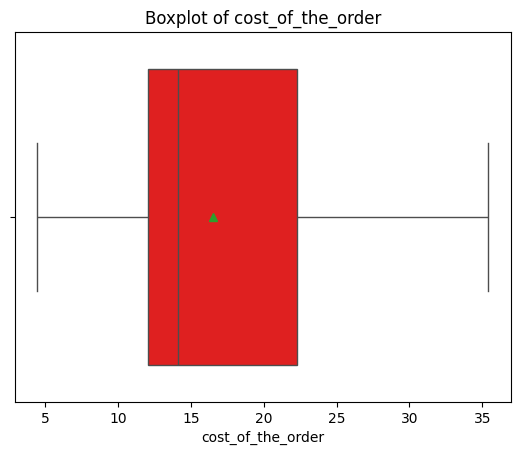

In [ ]:
# Boxplot of cost_of_the_order variable , showing the mean,  label & Title set
sns.boxplot(x=df['cost_of_the_order'], showmeans=True, color='Red')
plt.title('Boxplot of cost_of_the_order')
plt.show()

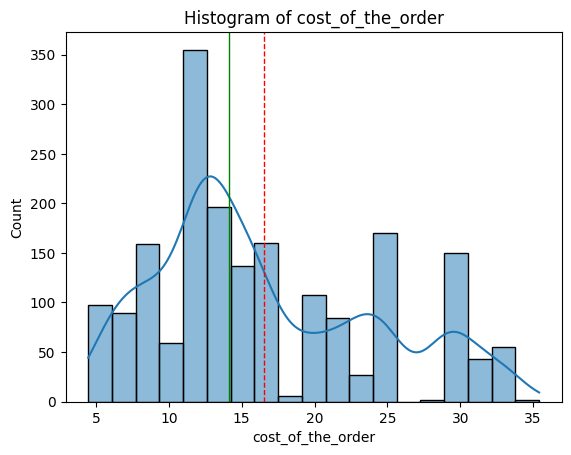

In [ ]:
# Histogram of cost_of_the_order , showing the mean in red and median  in green, Title set
sns.histplot(x=df['cost_of_the_order'], kde=True)
plt.axvline(df['cost_of_the_order'].mean(), color='red', linestyle='--', linewidth=1)
plt.axvline(df['cost_of_the_order'].median(), color='green', linestyle='-', linewidth=1)
plt.title('Histogram of cost_of_the_order')
plt.show()

**Observations**
> The distribution is right skewed (median close to the left and the whisker is shorter on the left end of the box).

> the cost per order seems to have different peaks : ~12,25,30 , the most used is ~12 dollars.

> The range is large, going from 5 to 35 dollars , 75% of orders are below 22 dollars.

>There are no outliers in this variable.

####Observations on rating

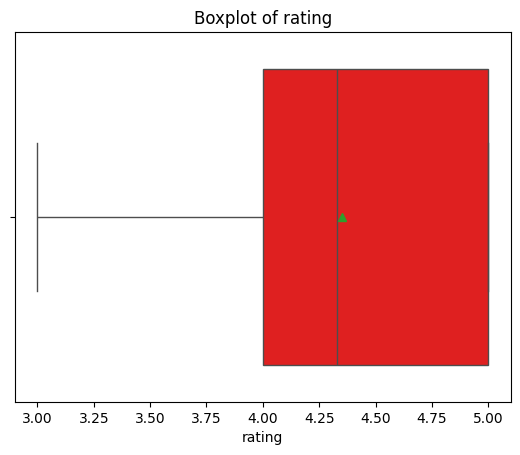

In [ ]:
# Boxplot of rating variable , showing the mean,  label & Title set
sns.boxplot(x=df['rating'], showmeans=True, color='Red')
plt.title('Boxplot of rating')
plt.show()

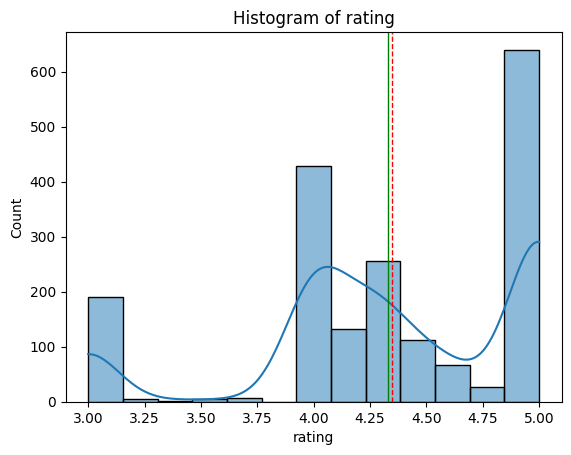

In [ ]:
# Histogram of rating , showing the mean in red and median  in green, Title set
sns.histplot(x=df['rating'], kde=True)
plt.axvline(df['rating'].mean(), color='red', linestyle='--', linewidth=1)
plt.axvline(df['rating'].median(), color='green', linestyle='-', linewidth=1)
plt.title('Histogram of rating')
plt.show()

**Observations**
> the distribution is left skewed (the whisker on the right end of the box doesn't exist).

> There is no rating below 3, the most used rating is 5 with more than 600 ratings.

> There is a link between rating count and  low rating.

####**Now the Categorical variables**

We will use count plot to explore the categorical variables.

#### Observation on Restaurant Name

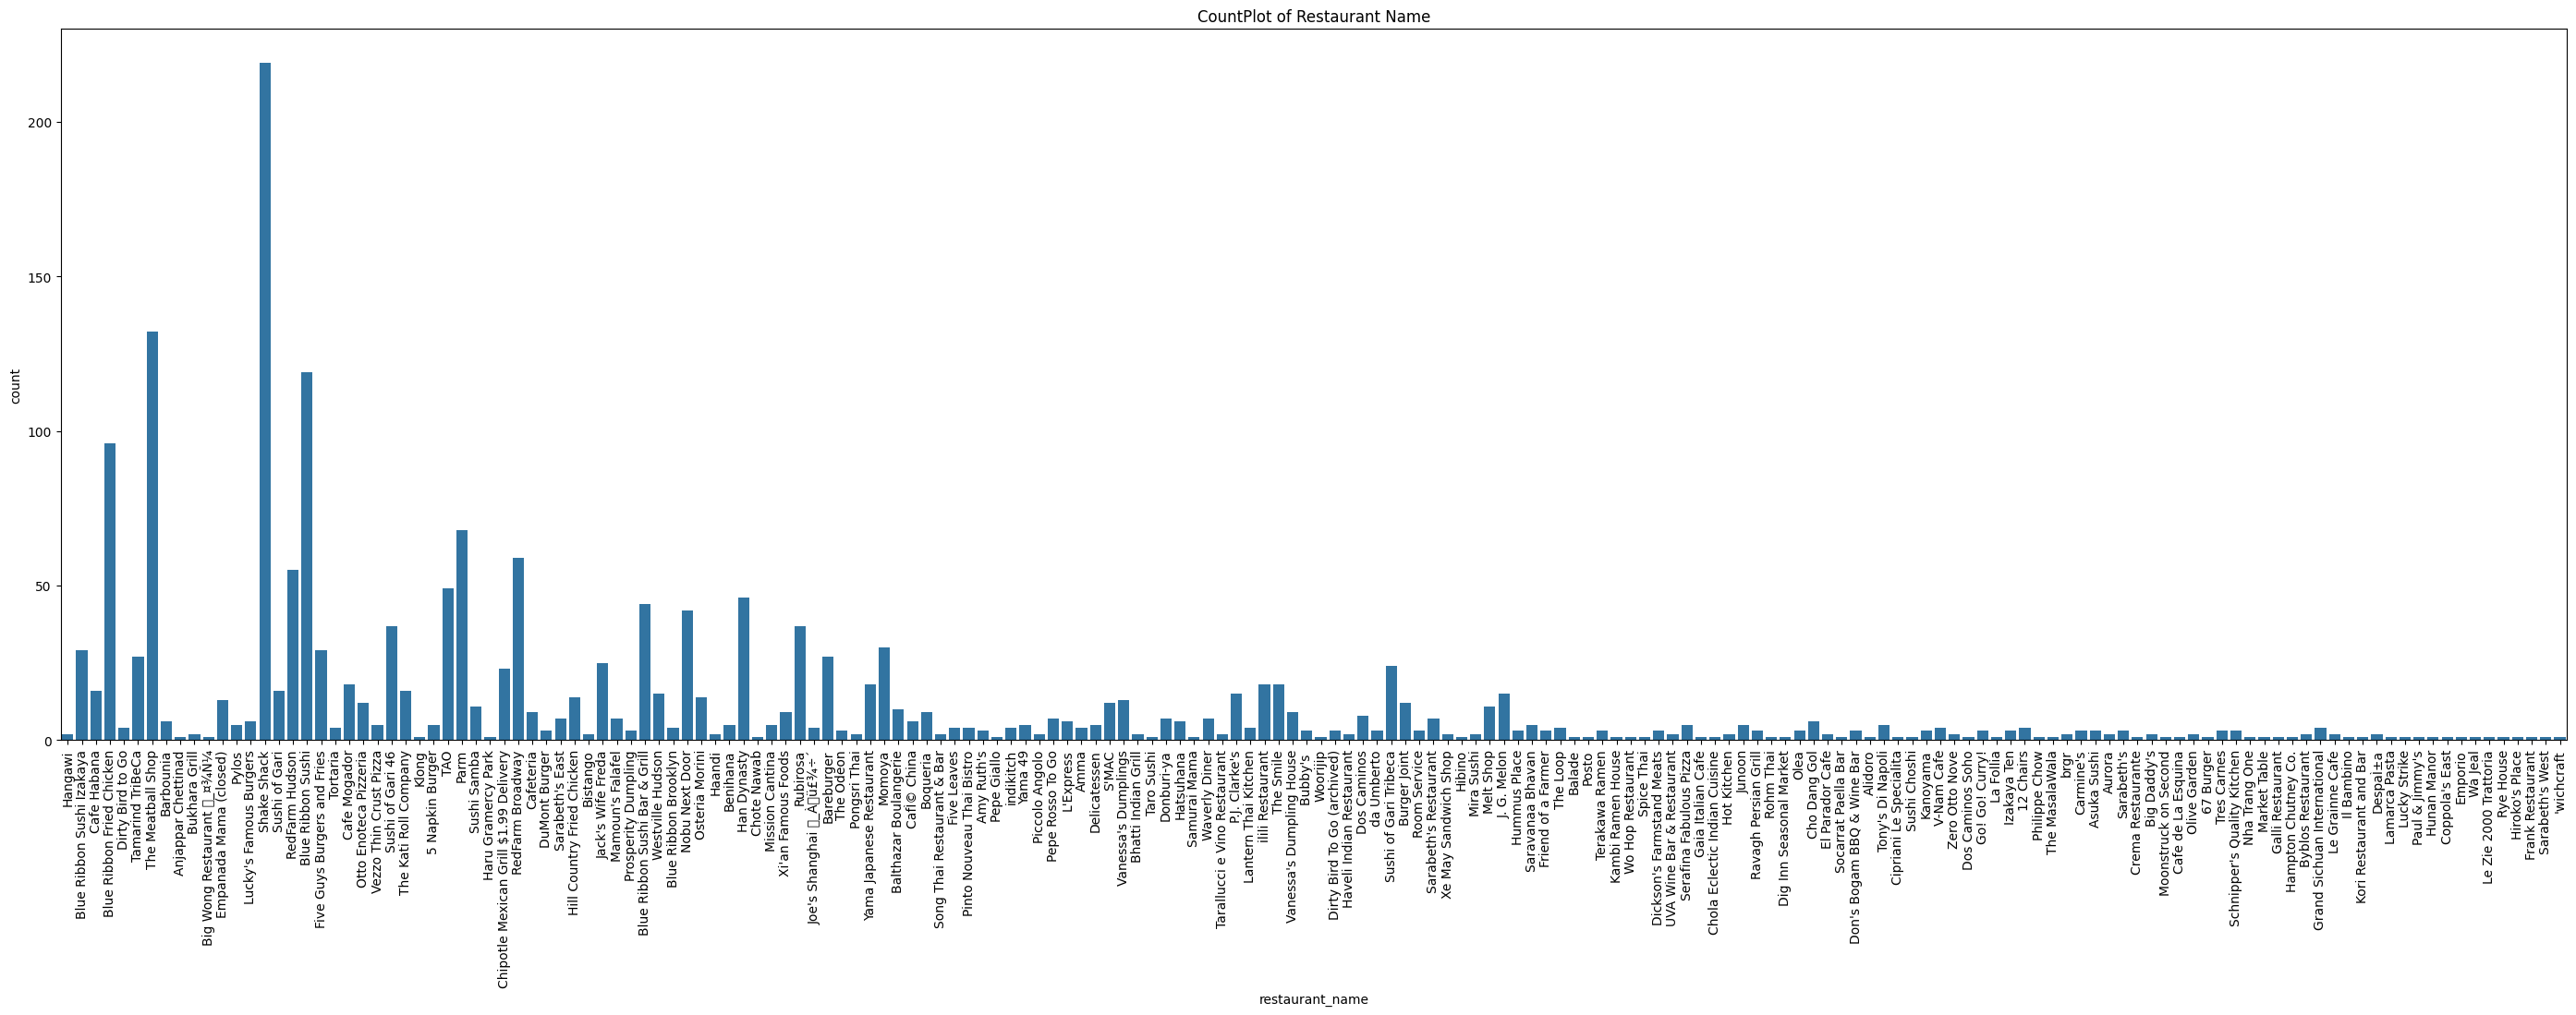

In [ ]:
# CountPlot to display the restaurant name and the count of orders
plt.figure(figsize=(35,10))
sns.countplot(x=df['restaurant_name'])
plt.xticks(rotation=90)
plt.title('CountPlot of Restaurant Name')
plt.show()

**Observations** :

> The restaurants with the highest number of orders : Shake Shak , followed by The Meatball Shop and the Blue Ribbon Sushi, between Shake Shak and the others there is an important difference in terms of orders.


#### Observation on Cuisine Type

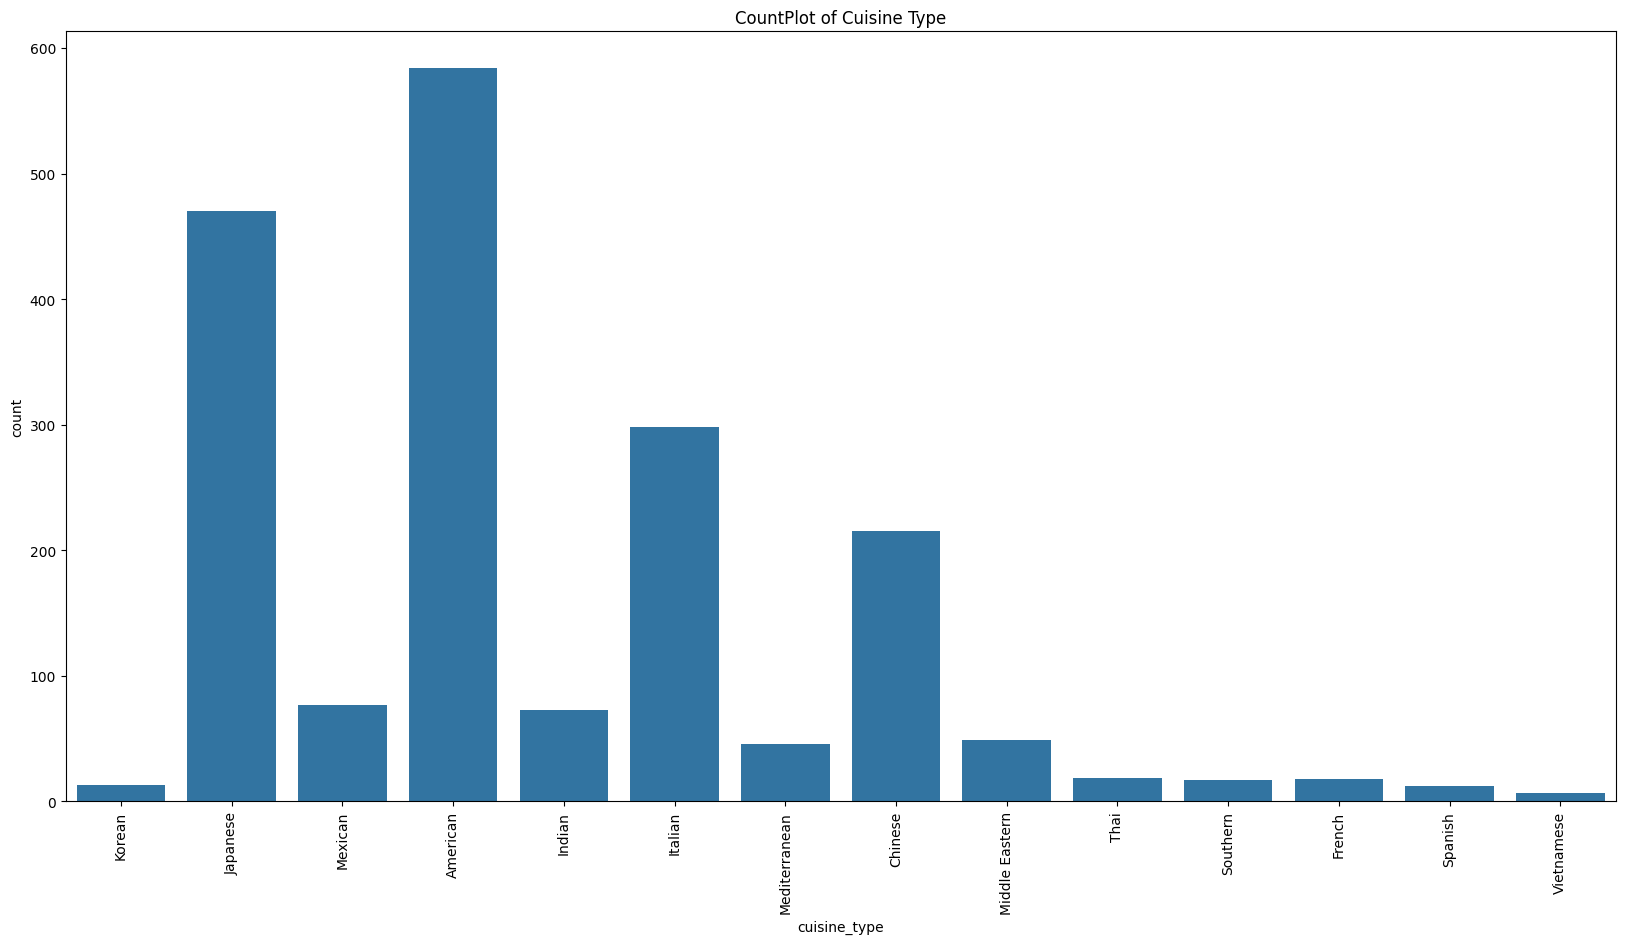

In [ ]:
# CountPlot to display the cuisine type and the count of orders
plt.figure(figsize=(20,10))
sns.countplot(x=df['cuisine_type'])
plt.xticks(rotation=90)
plt.title('CountPlot of Cuisine Type')
plt.show()

**Observations :**
>There is huge difference between cusine types and the number of orders, American, Japanese and Italian having the highest numbers of orders while Korean,Spanish and vietnamese have the lowest amount of orders.

#### Observation on Day of the week

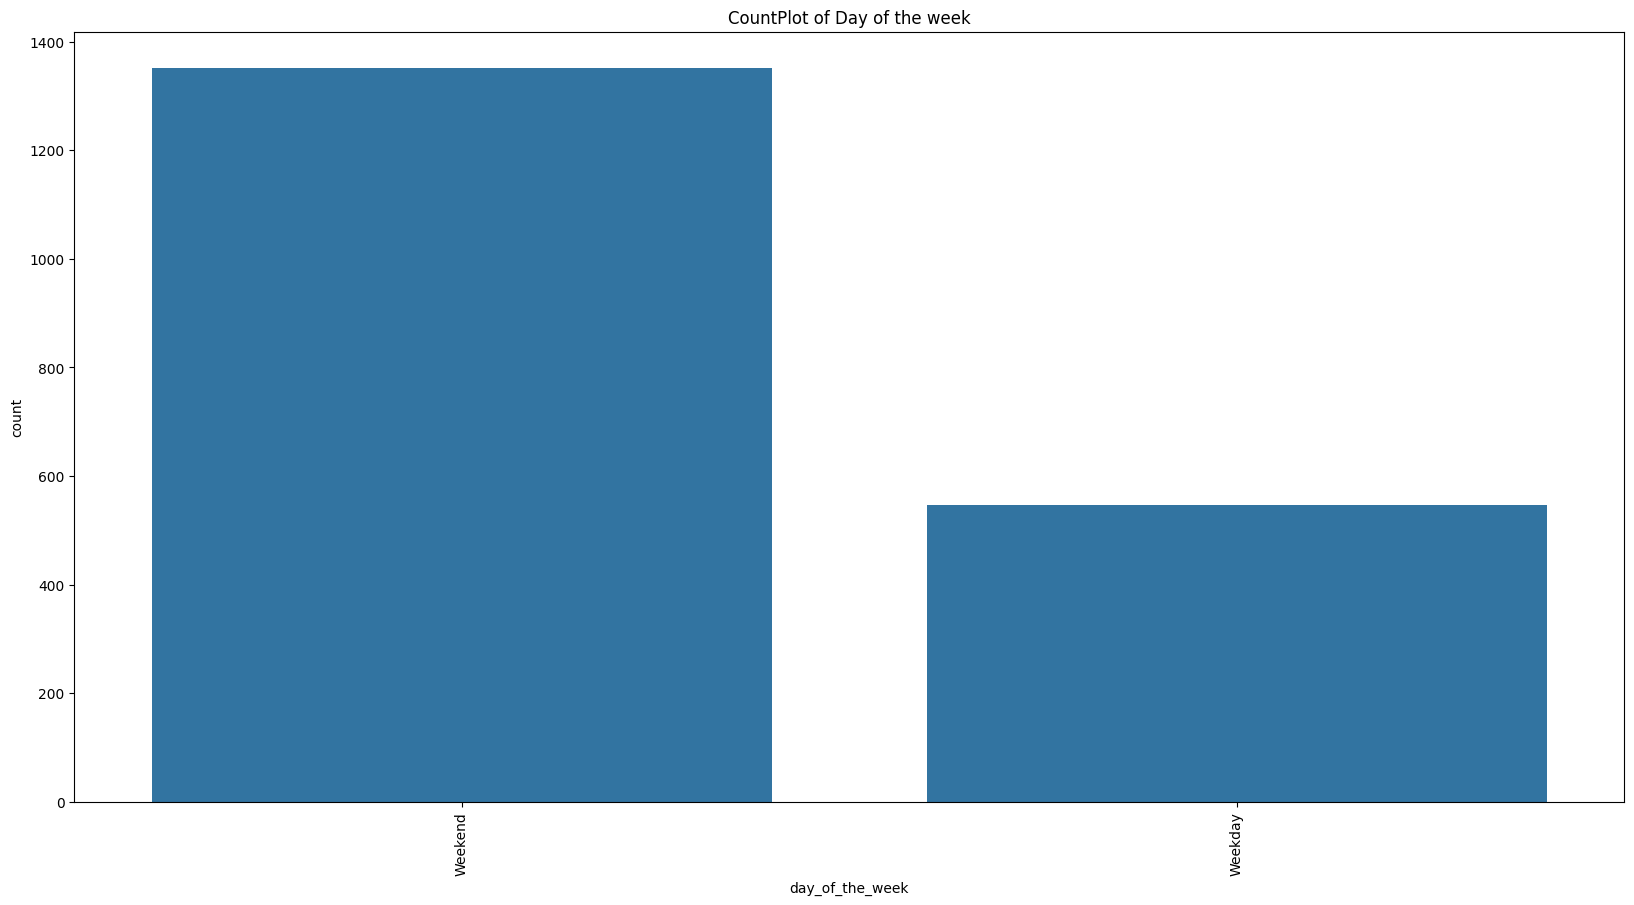

In [ ]:
# CountPlot to display day of the week and the count of orders
plt.figure(figsize=(20,10))
sns.countplot(x=df['day_of_the_week'])
plt.xticks(rotation=90)
plt.title('CountPlot of Day of the week')
plt.show()

In [ ]:
df['day_of_the_week'].value_counts()/df.shape[0]*100

,count
day_of_the_week,
Weekend,71.18019
Weekday,28.81981


**Observations**

> Most of the orders are made during the weekend (71%).

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# TOP 5 restaurants in terms of the number of orders received
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
>The TOP 5 restaurant are : Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Value counts between weekends only and the cuisine type
weekend_only = df[df['day_of_the_week'] == 'Weekend']
weekend_only['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
>The most popular cuisine on weekends is the **American**, followed by the Japanase and the Italian type.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# variable with only the orders that cost more than 20$
order_20 = df[df['cost_of_the_order'] > 20]

#  print percentage of the orders that cost more than 20$ rounded by 1
print(f'The percentage of the orders that cost more than 20$ is {round(order_20.shape[0]/df.shape[0]*100,1)}%')

The percentage of the orders that cost more than 20$ is 29.2%


#### Observations:

>The percentage of the orders that cost more than 20$ is 29,2%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Print the mean of the delivery time
print(f'The mean order delivery time is {round(df["delivery_time"].mean(),1)} minutes')

The mean order delivery time is 24.2 minutes


#### Observations:
>The mean order delivery time is around 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# FInd the TOP 3 customers and their ID
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
>The TOP 3 Customers is :

>Customer ID 52832 with 13 orders

>Customer ID 47440 with 10 orders

>Customer ID 83287 with 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#####**Relationship with numerical variables**

Let's start with numerical variables

In [ ]:
#To see the correlation table and the heatmap of numerical variables
# Correlation table
df.corr(numeric_only=True)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.007500,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.003116,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.035802,0.041527,-0.029949
rating,0.007500,0.003116,0.035802,1.000000,-0.008344,-0.001023
food_preparation_time,-0.007026,-0.030330,0.041527,-0.008344,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.001023,0.011094,1.000000


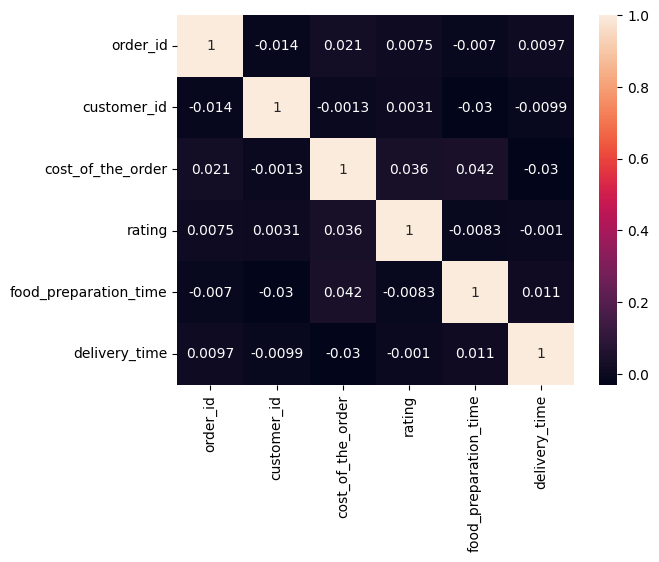

In [ ]:
# Heatmap
sns.heatmap(data=df.corr(numeric_only=True), annot=True,)
plt.show()

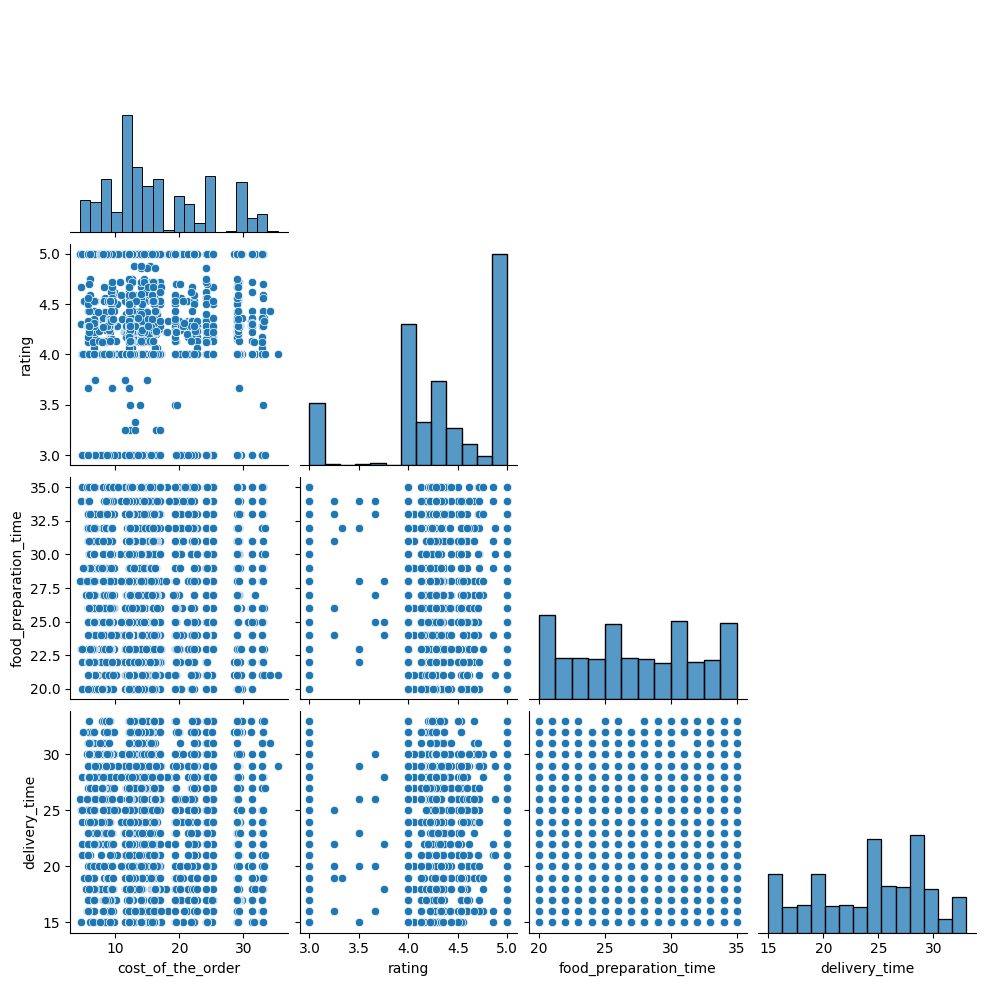

In [ ]:
#Let's check the relationship between numerical variables with Pair Plot (one corner only)
sns.pairplot(df[['cost_of_the_order','rating','food_preparation_time','delivery_time']], corner=True)
plt.show()

**Observations**

>There is little to no correlation between numerical variables

####**Relationship between numerical and Categorical variables**

#####**Let's start with Cost of the Orders**

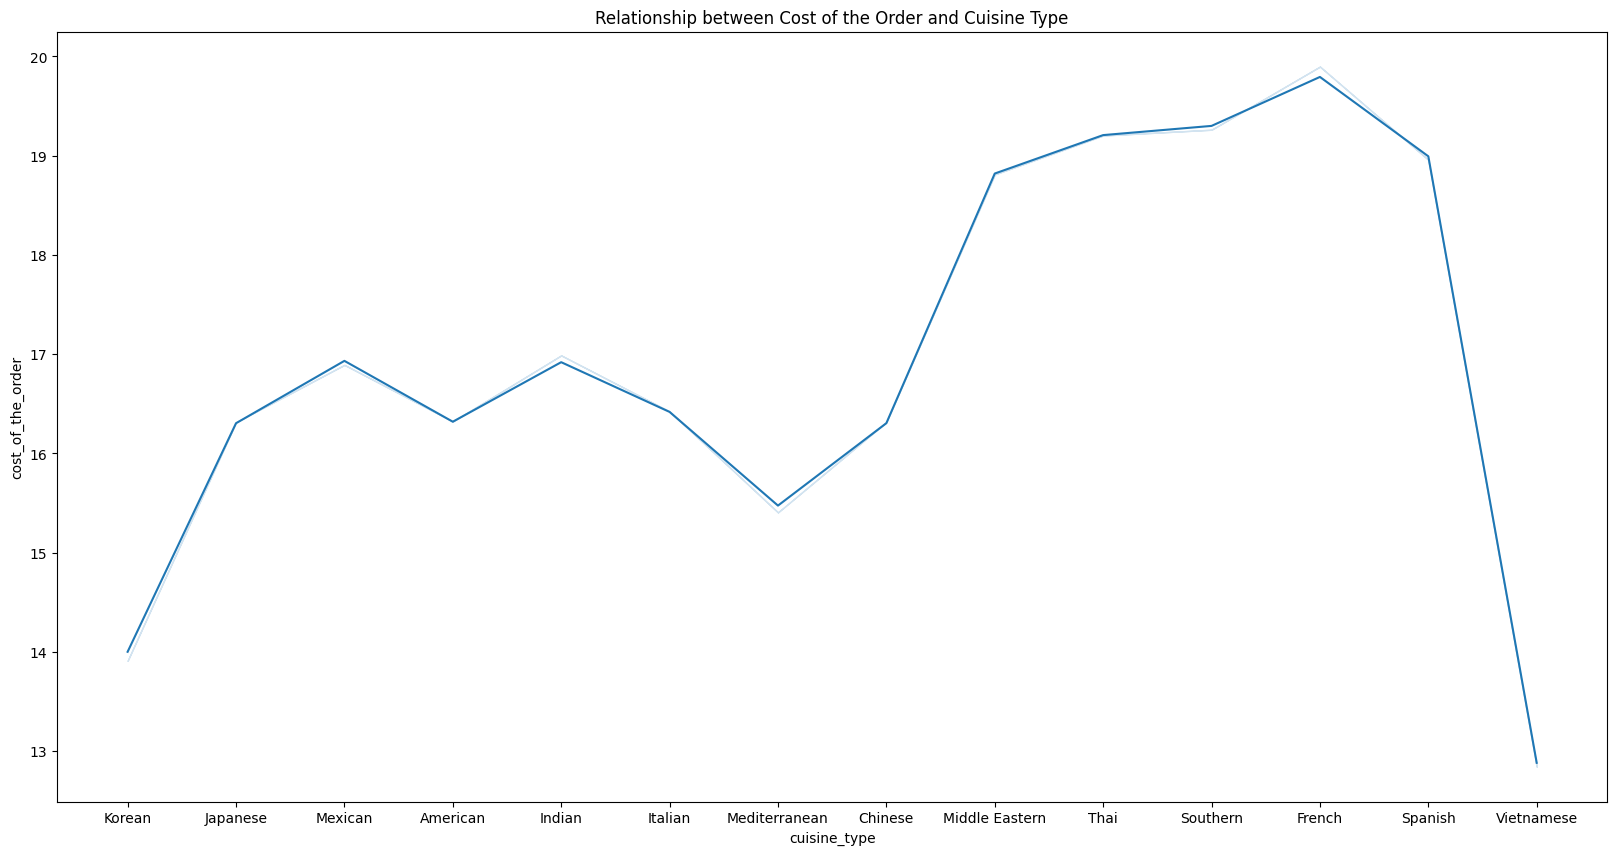

In [ ]:
# Relationship between cost of the order and Cuisine type
plt.figure(figsize=(20,10))
sns.lineplot(x='cuisine_type', y='cost_of_the_order', data=df, errorbar=('ci', False))
plt.title('Relationship between Cost of the Order and Cuisine Type')
plt.show()

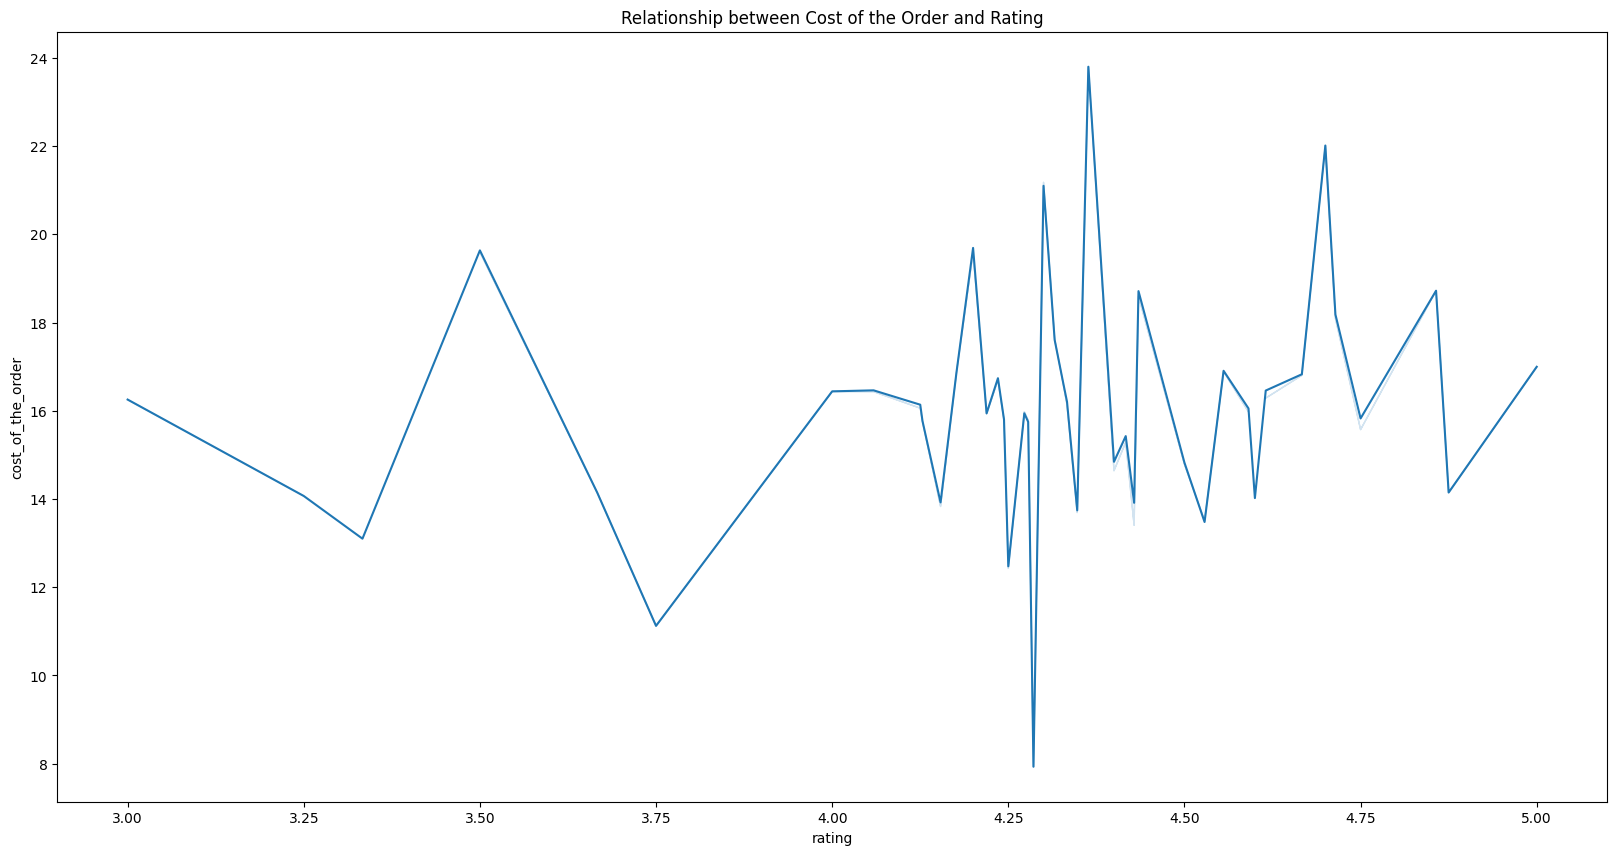

In [ ]:
# Relationship between cost of order & rating
plt.figure(figsize=(20,10))
sns.lineplot(x='rating', y='cost_of_the_order', data=df, errorbar=('ci', False))
plt.title('Relationship between Cost of the Order and Rating')
plt.show()

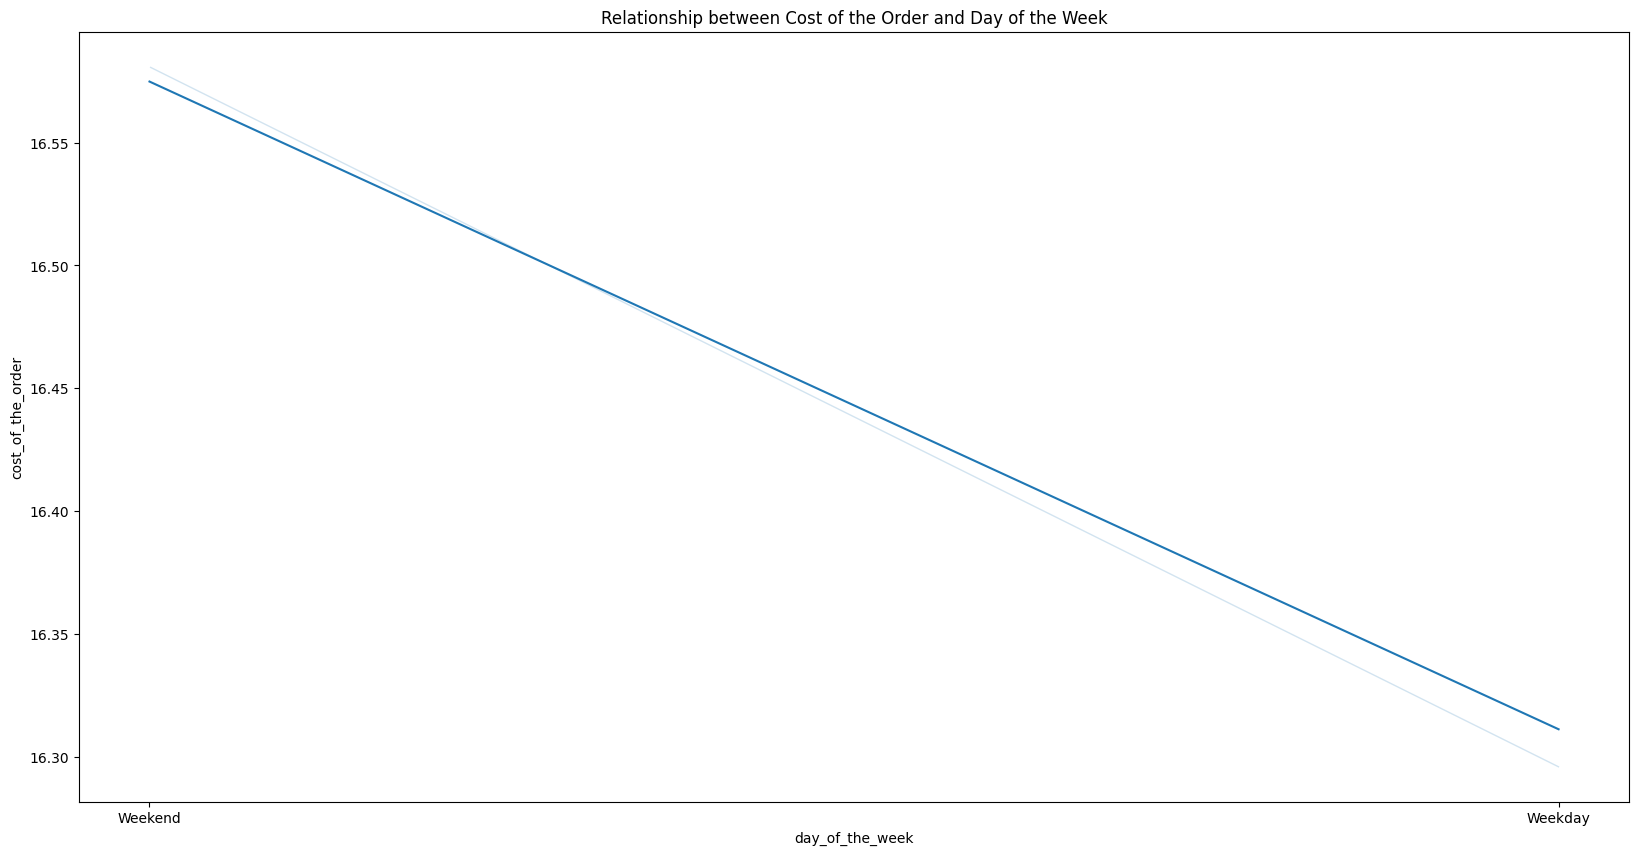

In [ ]:
# Relation between cost of the order and the day of the week
plt.figure(figsize=(20,10))
sns.lineplot(x='day_of_the_week', y='cost_of_the_order', data=df, errorbar=('ci', False))
plt.title('Relationship between Cost of the Order and Day of the Week')
plt.show()

**Observations**
> The average cost seems to vary between cuisine type , the highest average cost per order is the spanish, french while the lowest is the vietnamese and Korean

> There is little to no change between the day of the week and the cost of the order, that means there is not change in customers orders between weekends and weekdays

> There is not a clear relationship between the order cost and the rating , we can see good ratings with lower order cost and vice versa


#####**Analysis of Rating**

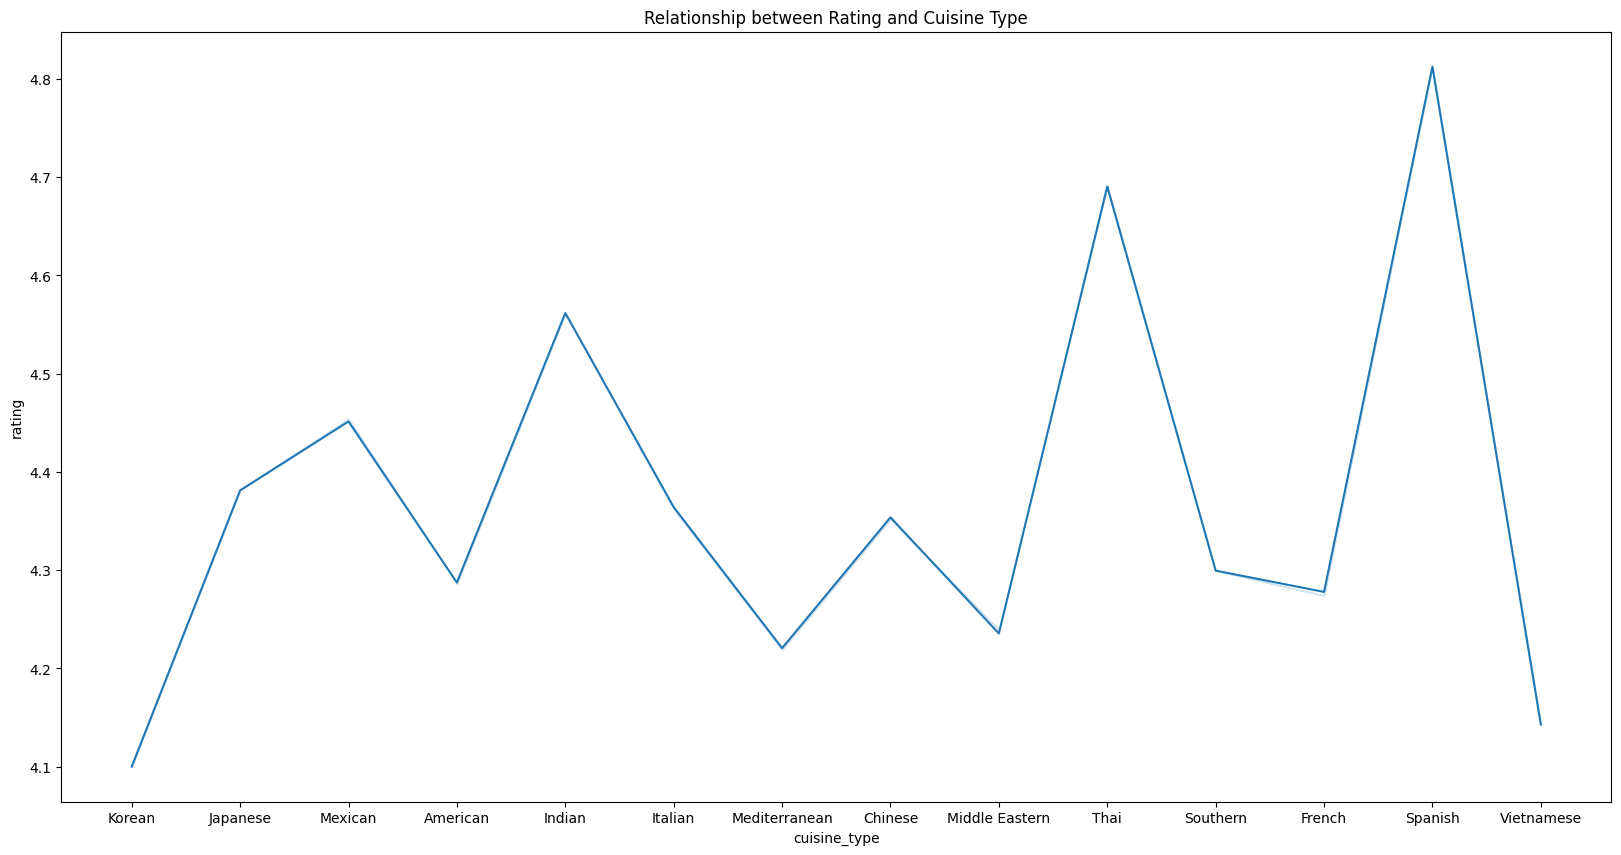

In [ ]:
# LinepLot of rating and cuisine type to see the relationship
plt.figure(figsize=(20,10))
sns.lineplot(x='cuisine_type', y='rating', data=df, errorbar=('ci', False))
plt.title('Relationship between Rating and Cuisine Type')
plt.show()

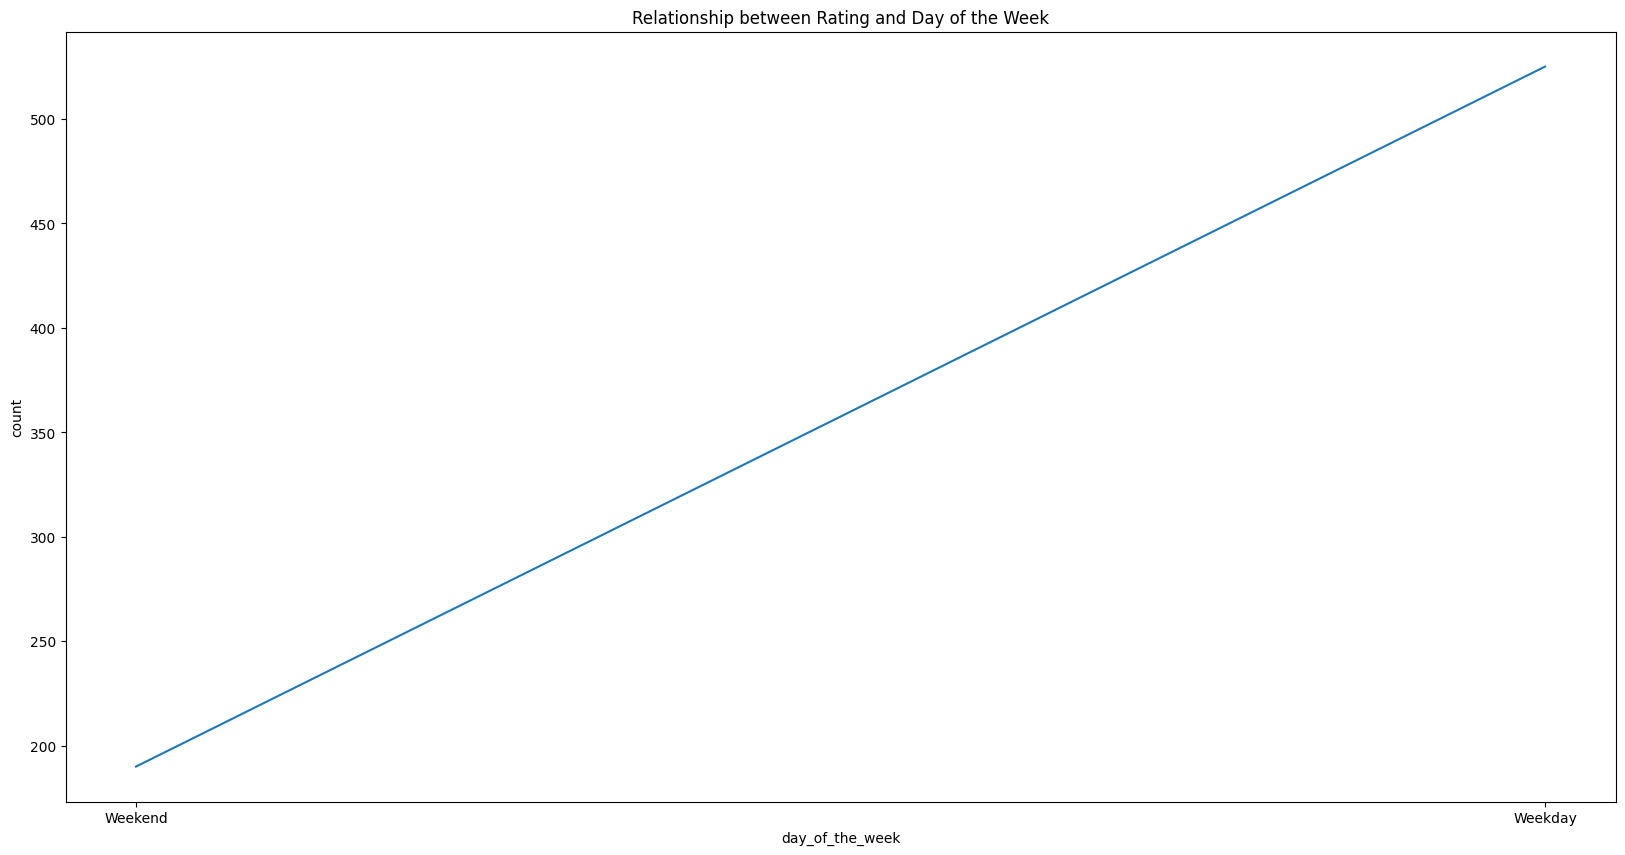

In [ ]:
#Rating count vs day of the week
plt.figure(figsize=(20,10))
sns.lineplot(x='day_of_the_week', y=df['rating'].value_counts(), data=df, errorbar=('ci', False))
plt.title('Relationship between Rating and Day of the Week')
plt.show()


**Observations**
>We could see that Spanish and Thai cuisine type has the highest average rating while Korean and Vietnamese have the lowest . The relationship could be impacted by the numbers of rating each cuisine type has received and the number of restaurants

> We can also see that there is more ratings during the Weekday than during the weekend, indicating customers are more willing to let a rating during weekdays.

#####**Analysis of Delivery Time & Food Preparation time**

We will combine both columns in a new one named Total Delivery time to check the overall time and his relationship with categorical variables

In [ ]:
# Combining food preparation time and delivery time into a new column total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
#Check the data to see the new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24,49


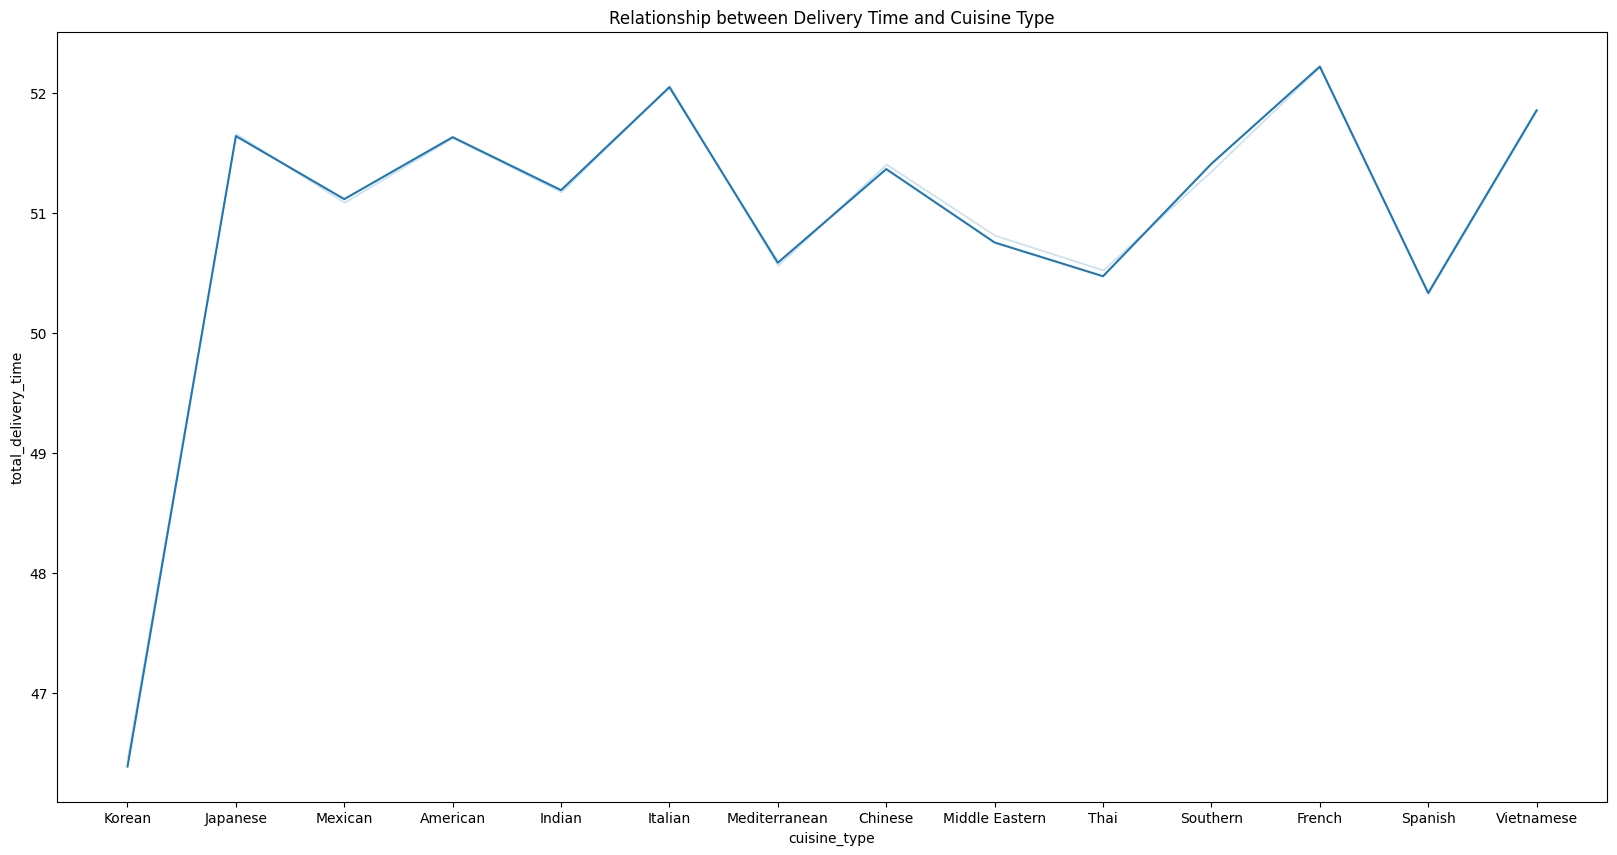

In [ ]:
# Line plot of total delivery time by cuisine type
plt.figure(figsize=(20,10))
sns.lineplot(x='cuisine_type', y='total_delivery_time', data=df, errorbar=('ci', False))
plt.title('Relationship between Delivery Time and Cuisine Type')
plt.show()

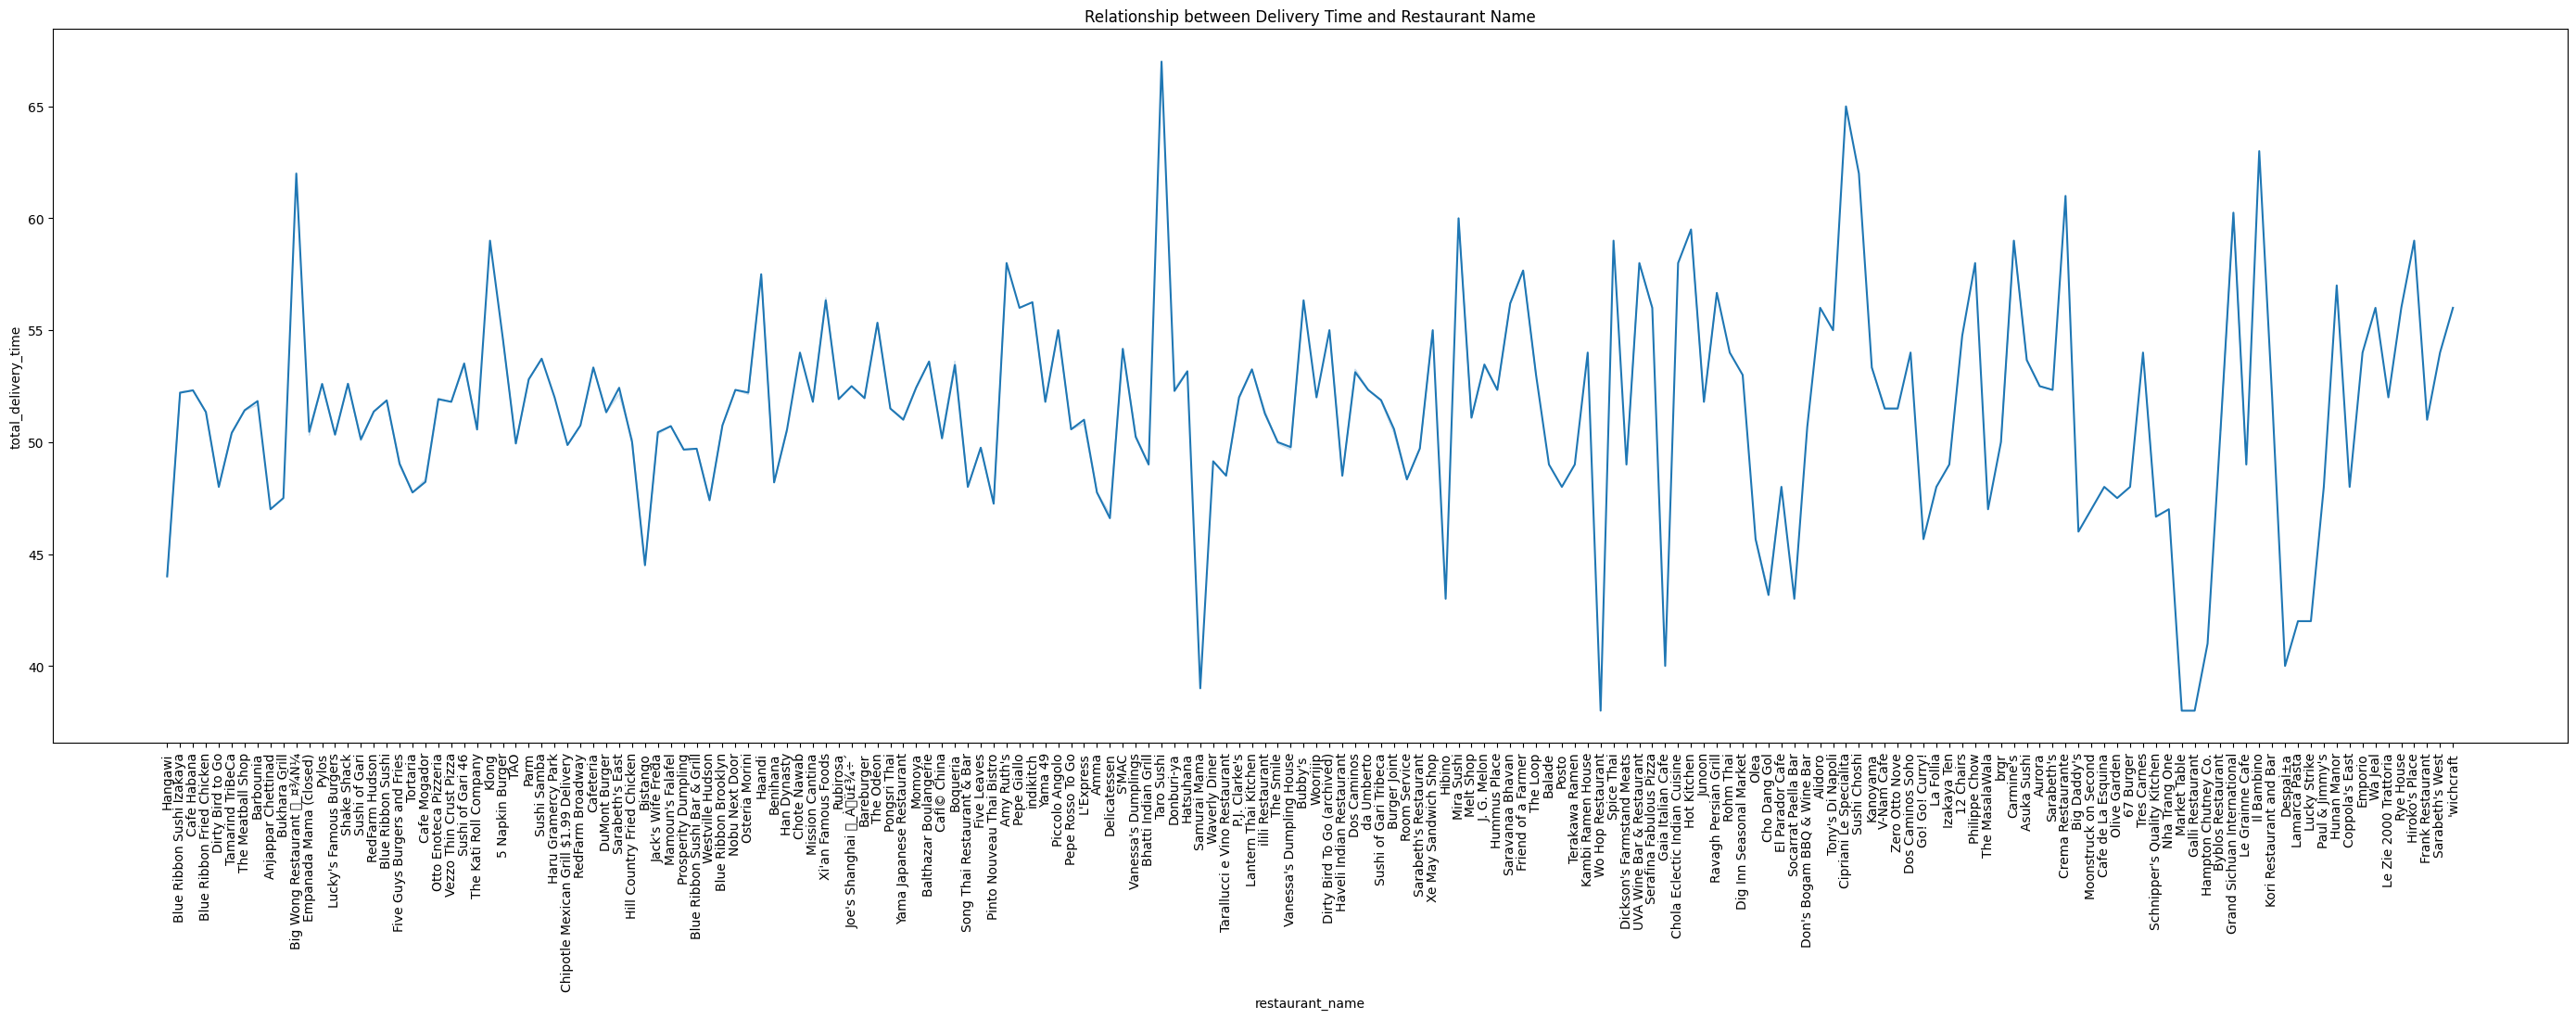

In [ ]:
# Lineplot of total delivery time by restaurant name
plt.figure(figsize=(35,10))
sns.lineplot(x='restaurant_name', y='total_delivery_time', data=df, errorbar=('ci', False))
plt.xticks(rotation=90)
plt.title('Relationship between Delivery Time and Restaurant Name')
plt.show()

**Observations**
> The average total delivery time is consistent accross cuisine type with the exception of the Korean one, who is below the average of the other cuisine type

> There are restaurants below 40 minutes of total delivery time, could indicate they are near of their customers or the preparation time is less than other restaurants and cuisine type

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Extraction of restaurants that have more than 50 ratings
restaurants_50 = df.groupby('restaurant_name')['rating'].count()
restaurants_50 = restaurants_50[restaurants_50 > 50]
restaurants_50.head()

#Extraction of the restaurants that have a rating greater than 4
restaurants_4 = df.groupby('restaurant_name')['rating'].mean()
restaurants_4 = restaurants_4[restaurants_4 > 4]
restaurants_4.head()

selected_restaurants = [] #creation of an empty list to store the selected restaurants
for restaurant in restaurants_50.index: # identify Restaurants That Meet Both Criteria and add them to the selected restaurants list
  if restaurant in restaurants_4.index:
    selected_restaurants.append(restaurant)


print(selected_restaurants)

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'Shake Shack', 'The Meatball Shop']


#### Observations:
>There are 7 restaurants that have more than 50 rating counts and an average rating of more than 4

> The restaurants are:

>* Blue Ribbon Fried Chicken

>* Blue Ribbon Sushi

>* Parm

>* RedFarm Broadway

>* RedFarm Hudson

>* Shake Shack

>* The Meatball Shop



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Extracting orders greater than 20$
orders_20 = df[df['cost_of_the_order'] > 20]
# Extracting orders greater than 5$ and less than 20
orders_5 = df[(df['cost_of_the_order'] > 5)& (df['cost_of_the_order'] < 20)]
print('Foodhub net revenue accross all orders is',(round(orders_20['cost_of_the_order'].sum() * 0.25 + orders_5['cost_of_the_order'].sum() * 0.15)),'dollars') # Print the total revenue calculation rounded

Foodhub net revenue accross all orders is 6166 dollars


#### Observations:
> The total net revenue generated by the company accross all orders is 6166 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# We will use the previous created column total_delivery_time to answer this question
df['total_delivery_time'].head()

,total_delivery_time
0,45
1,48
2,51
3,40
4,49


In [ ]:
# Extract orders take more than 60 minutes to get delivered
orders_60 = df[df['total_delivery_time'] > 60]
print(f'The percentage of orders that take more than 60 minutes to get delivered is {round(orders_60.shape[0]/df.shape[0]*100,1)}%') # print the percentage of orders delivered in more than 60min

The percentage of orders that take more than 60 minutes to get delivered is 10.5%


#### Observations:
>There are 10,5% of orders taking more thank 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Average delivery times depending on the day of the week
df.groupby('day_of_the_week')['total_delivery_time'].mean()

,total_delivery_time
day_of_the_week,
Weekday,55.552102
Weekend,49.906736


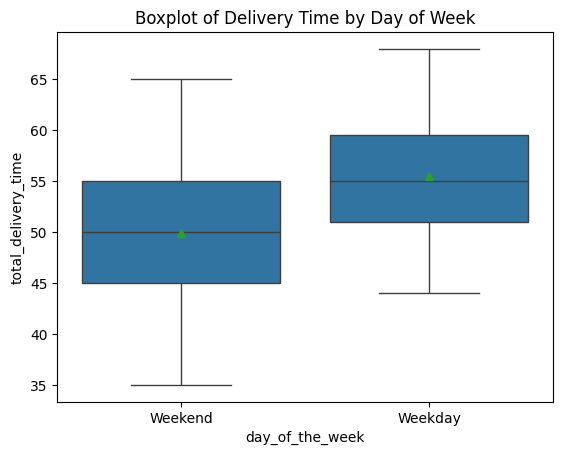

In [ ]:
# boxplot of delivery time by day of week
sns.boxplot(x='day_of_the_week', y='total_delivery_time', data=df, showmeans=True)
plt.title('Boxplot of Delivery Time by Day of Week')
plt.show()

#### Observations:

> The mean of delivery time during weekend is ~50 minutes while during weekday is ~55minutes

> Weekdays have a higher average delivery times than weekends

> Weekends have higher variance in delivery times, could be explained by the higher demand during the weekends

> Despite the higher average delivery times during weekdays, the variance is much lower than during weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Data Quality:

The dataset exhibits good quality without outliers, providing an excellent opportunity to gain insights into the Foodhub business and assess overall service performance.

* Missing Ratings:

The rating column, which measures customer satisfaction, has a significant number of missing values (38.7%). We have imputed the missing values using weighted means for restaurants that already had ratings, while leaving 1.5% as NaN for restaurants without any ratings to avoid bias in the analysis.

* Cuisine Concentration:

Orders are highly concentrated around specific cuisines (71%, specifically American, Japanese, and Italian), with three restaurants (Shake Shack, The Meatball Shop, and Blue Ribbon Sushi) accounting for 25% of the total orders.

* Order Timing:

The majority of orders (71%) are placed during the weekend.

* Preparation and Delivery Times:

There appears to be no significant performance issues regarding preparation and delivery times, as the variation is quite low. Most orders are prepared within 31 minutes or less, with an average delivery time of around 25 minutes. The total delivery time (including preparation) averages around 50-55 minutes, which could be an area for improvement despite seeming to have no negative impact on customer satisfaction.

* Order Cost:

75% of orders cost below 22 dollars, indicating that lower-cost options are more popular. Additionally, there is a notable number of orders exceeding $20, suggesting a segment of the customer base is making larger purchases.

* Customer Ratings:

The absence of ratings below 3 stars may lead to a distorted representation of customer satisfaction. It also appears that customers are more inclined to provide ratings on weekdays than on weekends.




### Recommendations:

*  Leverage High-Quality Data:

Utilize the clean dataset to perform in-depth analyses and gain insights into Foodhub's business operations and customer preferences.
Implement advanced analytics and machine learning models to predict customer behavior, improve marketing strategies, and enhance service delivery.
* Address Missing Ratings:

Consider implementing a more robust system for collecting customer ratings to reduce the percentage of missing values.
Encourage customers to rate their orders by offering incentives or simplifying the rating process.
Continuously monitor the imputation method for missing ratings to ensure it remains unbiased and accurate.
* Focus on Popular Cuisines and Restaurants:

Given that American, Japanese, and Italian cuisines make up 71% of orders, expand partnerships and promotional efforts with these types of restaurants.
Develop targeted marketing campaigns to highlight these popular cuisines and leverage the popularity of the top restaurants (Shake Shack, The Meatball Shop, and Blue Ribbon Sushi) to attract more customers.
* Optimize Weekend Operations:

Since most orders are placed during the weekend (71%), ensure adequate staffing and resource allocation to handle peak demand efficiently.
Explore special weekend promotions or loyalty programs to maximize sales during this high-traffic period.
* Improve Delivery Efficiency:

Although the current delivery time averages around 50-55 minutes, aim to reduce this further to enhance customer satisfaction.
Investigate potential bottlenecks in the delivery process and explore options such as optimizing delivery routes, increasing the number of delivery personnel, or partnering with third-party delivery services.
Communicate expected delivery times clearly to manage customer expectations and reduce dissatisfaction.
* Cost-Conscious Customers:

With 75% of orders costing below $22, continue offering and promoting affordable menu options to attract budget-conscious customers.
Additionally, consider developing value meal bundles or discounts for higher-priced orders to cater to larger groups or customers willing to spend more.
* Ensure Balanced Customer Feedback:

Address the absence of ratings below 3 stars by implementing measures to collect more balanced feedback, such as anonymized surveys or follow-up questions specifically targeting areas for improvement.
Investigate why customers are more willing to provide ratings during weekdays and implement strategies to encourage weekend ratings, such as post-delivery follow-ups or weekend-specific incentives.

---